In [12]:
import networkx as nx
from tqdm import tqdm
import numpy as np
from gensim.models import word2vec

G = nx.read_edgelist(
    "/home/ray/code/python/GNN-from-Scratch/GraphEmbedding/data/wiki/Wiki_edgelist.txt",
    create_using=nx.DiGraph(),
    nodetype=None,
    data=[("weight", int)],
)

In [13]:
print(G)

DiGraph with 2405 nodes and 16523 edges


In [14]:
import networkx as nx

g = nx.fast_gnp_random_graph(n=30, p=0.2, directed=True)
print(g)

DiGraph with 30 nodes and 178 edges


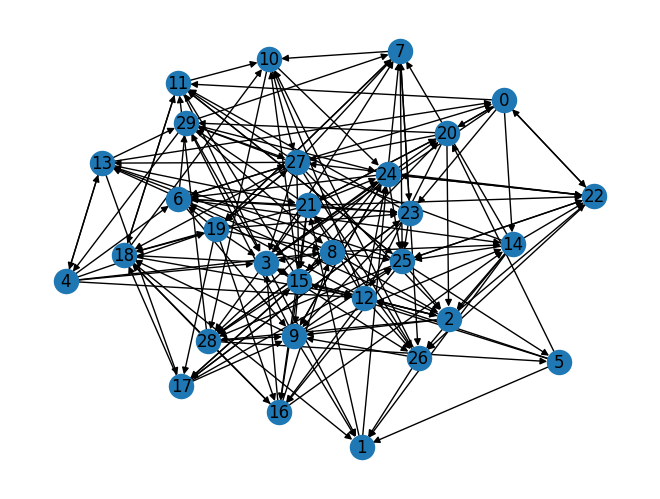

In [15]:
nx.draw(g, with_labels = True)

In [16]:
def walkOneTime(G, start_node, walk_length):
    """单独生成一条序列

    Args:
        G (_type_): _图_
        start_node (_node_): _起始节点_
        walk_length (_int_): _序列长度_
    """
    walk = [str(start_node)]  # 起始节点
    for _ in range(walk_length):
        current_node = int(walk[-1])
        successors = list(G.successors(current_node))
        if len(successors) > 0:
            next_node = np.random.choice(successors, 1)
            walk.extend(list(map(str, next_node)))
        else:
            break
    return walk


def getDeepWalkSeqs(G, walk_length, num_walks):
    """get sequences

    Args:
        G (_Graph_): _Graph_
        walk_length (_int_): _每个序列的长度_
        num_walks (_int_): _序列的个数_
    """
    seqs = []
    for _ in tqdm(range(num_walks)):
        start_node = np.random.choice(G.nodes)
        w = walkOneTime(G, start_node, walk_length)
        seqs.append(w)
    return seqs


def deepwalk(G, dimensions=10, walk_length=80, num_walks=10, min_count=3):
    seqs = getDeepWalkSeqs(G, walk_length=walk_length, num_walks=num_walks)
    print(seqs)
    model = word2vec.Word2Vec(seqs, vector_size=dimensions, min_count=min_count)
    return model

In [17]:
model = deepwalk(g, dimensions=10, walk_length=20, num_walks=1000, min_count=3)
print(model.wv.most_similar("2", topn=5))


100%|██████████| 1000/1000 [00:00<00:00, 2759.80it/s]


[['5', '1', '21', '16', '3', '18', '19', '8', '17', '9', '1', '21', '15', '3', '20', '21', '18', '10', '24', '25', '13'], ['18', '10', '27', '18', '10', '27', '11', '18', '11', '3', '7', '23', '26', '9', '1', '21', '23', '7', '25', '28', '5'], ['17', '15', '16', '8', '14', '26', '10', '28', '5', '15', '10', '28', '18', '10', '27', '26', '9', '1', '24', '15', '9'], ['10', '27', '13', '0', '11', '10', '24', '28', '18', '1', '24', '28', '9', '24', '7', '10', '27', '0', '14', '2', '12'], ['13', '17', '23', '25', '11', '3', '18', '11', '10', '24', '15', '10', '27', '6', '9', '18', '19', '3', '28', '16', '18'], ['28', '5', '12', '16', '14', '22', '25', '2', '28', '5', '12', '6', '9', '18', '19', '27', '7', '10', '27', '26', '9'], ['29', '24', '28', '8', '28', '5', '20', '27', '26', '21', '24', '6', '9', '29', '3', '20', '21', '16', '18', '19', '27'], ['5', '20', '29', '3', '7', '19', '17', '23', '9', '14', '26', '10', '24', '15', '3', '7', '23', '7', '25', '22', '25'], ['3', '28', '9', '25',

In [18]:
dir(g)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 '_pred',
 '_succ',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'has_predecessor',
 'has_successor',
 'in_degree',
 'in_edges',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_di

In [29]:
import random
g = nx.fast_gnp_random_graph(n=30, p=0.2, directed=True)
# 为每条边生成随机权重
weights = {(u, v): random.random() for u, v in g.edges()}
# 将权重添加到边的属性中
nx.set_edge_attributes(g, values=weights, name='weight')
for node in g.nodes():
    unnormalized_probs = [g[node][nbr]["weight"] for nbr in sorted(g.neighbors(node))]
    norm_const = sum(unnormalized_probs)
    K = len(unnormalized_probs)
    normalized_probs = [float(u_prob) * K / norm_const for u_prob in unnormalized_probs]
    print(normalized_probs)

[1.3810154065942681, 0.6912164173398344, 1.0560452234658821, 0.38772908877910645, 0.9600479732994391, 1.636697796611319, 0.8872480939101511]
[1.3129416869472452, 1.2927931142049267, 1.15493348144579, 0.9053019817020593, 0.967130255270408, 0.21214473533628966, 1.1547547450932811]
[1.749921458759633, 0.12470266700585989, 1.272180011441607, 0.9393186986173031, 0.9138771641755971]
[0.5691295979283639, 0.8188007202689327, 0.8082434088100802, 0.9083125698134599, 1.3423500798429555, 1.5552503913011602, 0.5515154272012059, 1.9174421147081138, 0.5289556901257271]
[1.2719835127250825, 1.7232176230324165, 0.7111164166039365, 0.29368244763856477]
[0.7844409589875314, 1.1895892236225638, 0.7278141856634316, 1.1151922978097668, 1.1829633339167065]
[1.684457408503533, 0.315542591496467]
[0.619255709479008, 0.5372027875414004, 0.610383266050056, 1.7799161039287201, 0.034680347711658344, 2.418561785289157]
[1.3102240993658887, 1.521656566991684, 1.2332590498692286, 0.32065570606882066, 0.61420457770437

In [24]:
g.is_directed()

True